**Abstract**

In this notebook, I explore explore and build a logistic regression model based of manually extracted world database data. 

The aim is to predict how socioeconomic factors can predict a high probability of life and to identify what variables affect the outcome the most. 

The model was build by hand with no use of the SKlearn model package while for ease of testing and spliting the train_test_split package was used. 

*As a result* the output model predicted the probability of high life with ¬ 90% accuracy over 100000 epochs which is a good metric considering the small size of the dataset, 104 countries.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import seaborn as sns

data = pd.read_csv(r"C:\Users\sorin.creanga\Desktop\Visualisations\urbanisation_csv.csv", index_col=0)
print(data.columns)
print(data.head())#


Index(['CountryName', 'IndepYear', 'CountryPopulation', 'GNP', 'GNPOld',
       'gnp_per_capita', 'gnp_delta', 'CapitalName', 'CapitalPopulation',
       'urbanization_rate', 'target_high_life'],
      dtype='object')
               CountryName  IndepYear  CountryPopulation       GNP    GNPOld  \
code                                                                           
AGO                 Angola       1975           12878000    6648.0    7984.0   
ALB                Albania       1912            3401200    3205.0    2500.0   
ARE   United Arab Emirates       1971            2441000   37966.0   36846.0   
ARG              Argentina       1816           37032000  340238.0  323310.0   
ARM                Armenia       1991            3520000    1813.0    1627.0   

      gnp_per_capita  gnp_delta   CapitalName  CapitalPopulation  \
code                                                               
AGO            0.001    -1336.0        Luanda            2022000   
ALB            0.

The Correlation Matrix is the core identifire for the metrics to perform logistic regresion to find how country economic and population data can predict a high life expectancy. 

From the Matrix these are the core metrics:
 - GNP Per Capita
 - Urbanization Rate
 - Capital Population

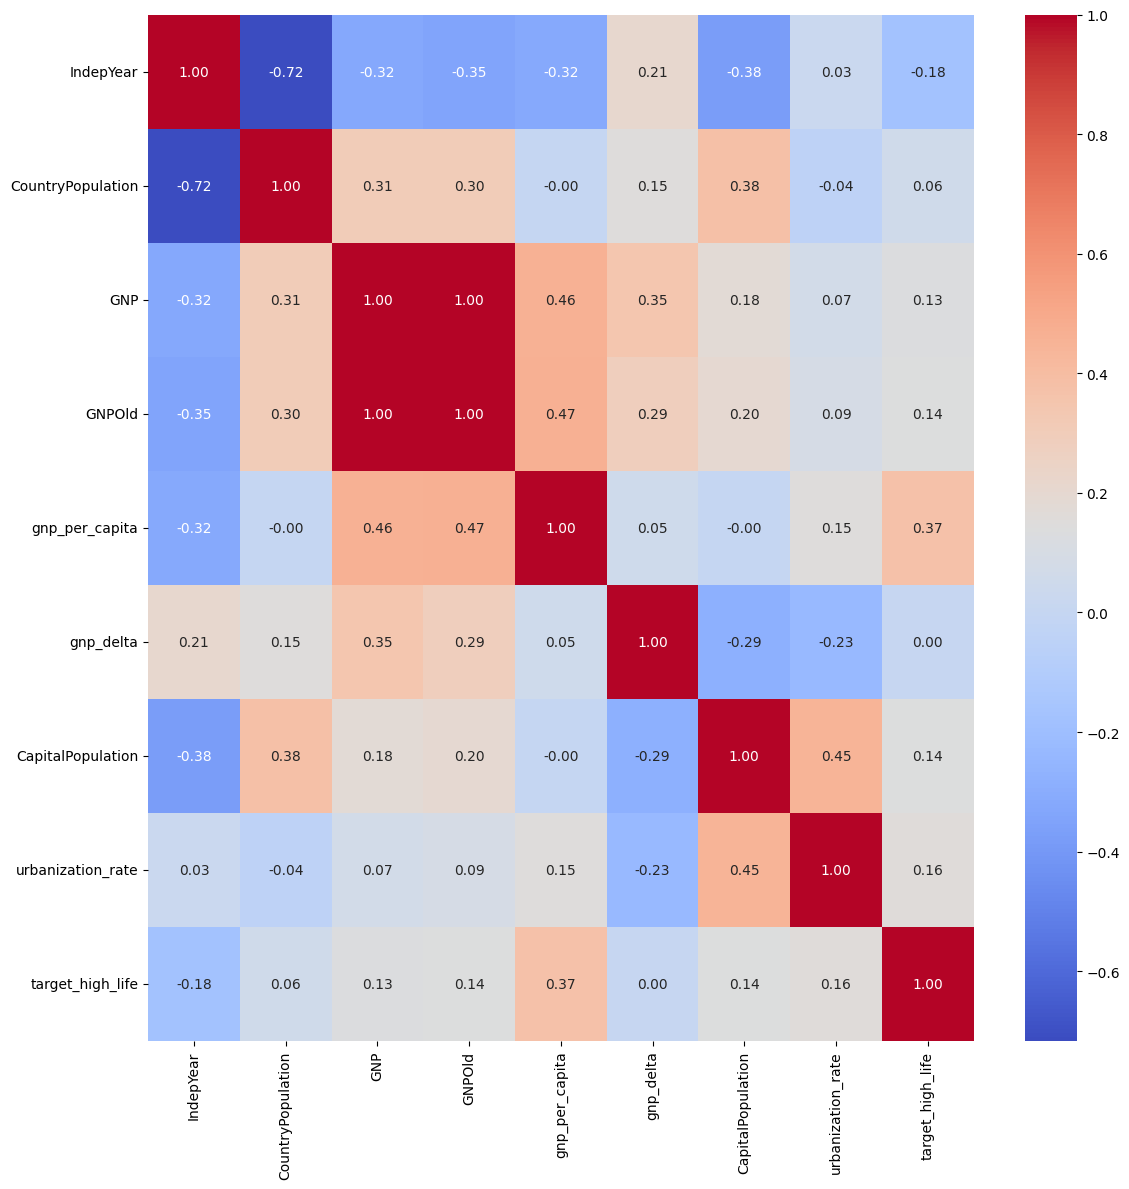

In [2]:
plt.figure (figsize=(12,12))
# Correlation matrix
cols = data.columns.to_list()
cols.pop(0) # string data
cols.pop(-4) # string data

corr = data[cols].corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.tight_layout()

In [3]:
train_data = data[["gnp_per_capita","urbanization_rate","CapitalPopulation"]].values
output_data = data["target_high_life"].values

number_train, number_input = train_data.shape


There is a need to Standardize some data like Capital Population before building the model. This technique ensures that the sigmoid function won't break due to enormous value range. 

In [4]:
train_mean = np.mean(train_data, axis=0)
train_std = np.std(train_data,axis=0)
train_scaled = (train_data-train_mean) / train_std

In [5]:
def sigmoid (z):
    return 1/ (1 + np.exp(-z)) # ln log

In [6]:
def cost_funtion(train, input, w, b): # w, b are the current parrameters of the model
    cost_sum = 0
    epsilon = 1e-15

    
    for i in range(len(train)):

        z = np.dot(w, train[i])+b
        g = sigmoid(z)
        g = np.clip(g,epsilon,1-epsilon) # helps avoid log(0)
        cost_sum += - input[i]*np.log(g) - (1-input[i])* np.log(1-g)

    return (1/number_train)*cost_sum
    


In [7]:
def gradient(train, input, w,b):
    grad_w =np.zeros(train.shape[1])
    grad_b = 0

    for i in range(len(train)):
        z = np.dot(w, train[i])+b
        g = sigmoid(z)

        grad_b += (g - input[i])

        for j in range(number_input):
            grad_w[j] += (g- input[i]) * train[i,j]

    
    grad_b = (1/number_train)*grad_b
    grad_w = (1/number_train)*grad_w

    return grad_b, grad_w

In [8]:
def gradient_descent (train, input,alpha):
    w = np.zeros(train.shape[1])
    b= 0

    for i in range(100000):

        grad_b, grad_w = gradient(train, input, w,b)

        w = w-alpha*grad_w
        b = b-alpha*grad_b

        """ if i %1000 ==0:
            print(f"{i}: Cost {(cost_funtion(train,input,w,b))}")""" # use this if you want to see how the cost improves as the range of iterations grows

    return w,b


In [9]:
def predict(train, w,b):
    pred = np.zeros(len(train))
    

    for i in range(len(train)):
        z = np.dot(w,train[i])+b
        g =sigmoid(z)

        pred[i]= 1 if  g>=0.5 else 0
    
    return pred



In [10]:
alpha = 0.25

final_w, final_b = gradient_descent(train_scaled,output_data, alpha)

Testing the model on the 20% of the orginal using train_test_split from SKlearn.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_scaled, output_data, test_size=0.2,random_state=42)

test_predictions = predict(X_test, final_w, final_b)

test_accuracy = np.mean(test_predictions == y_test) * 100

train_predictions = predict(X_train, final_w, final_b)
train_accuracy = np.mean(train_predictions == y_train) * 100

print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

Training Accuracy: 79.52%
Test Accuracy: 90.48%


C:\Users\sorin.creanga\AppData\Local\Temp\ipykernel_42436\841135806.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=final_w, y=feature_names, palette=colors, ax=axes[0])


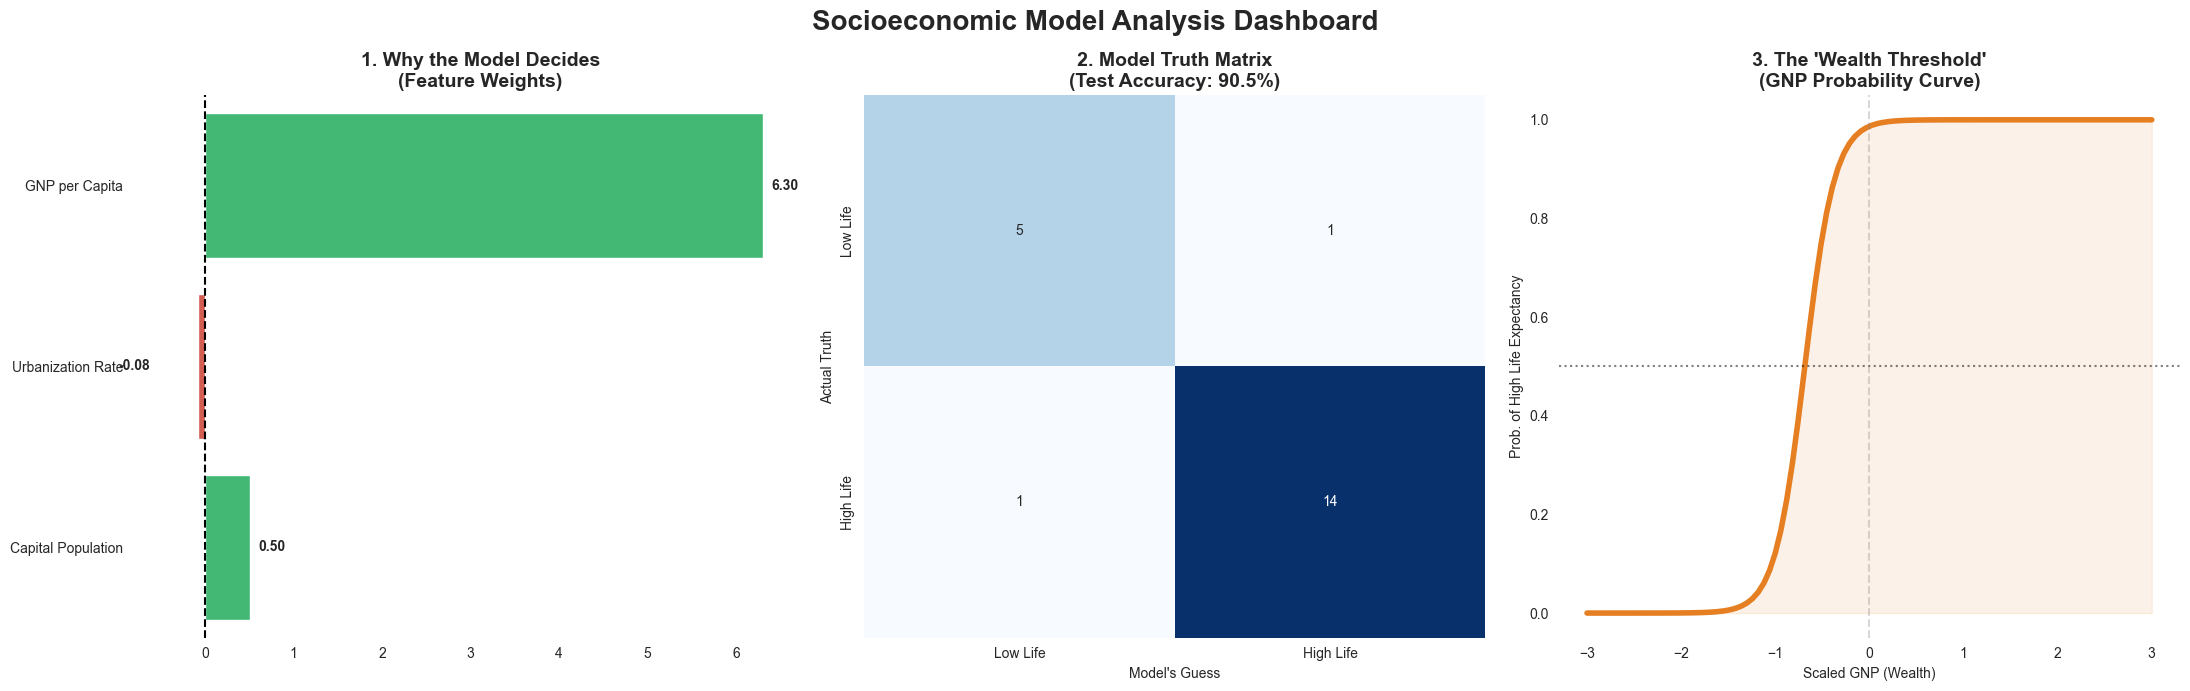

In [13]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1
fig, axes = plt.subplots(1, 3, figsize=(22, 7))
sns.set_style("white")


feature_names = ["GNP per Capita", "Urbanization Rate", "Capital Population"]
colors = ['#2ecc71' if w > 0 else '#e74c3c' for w in final_w]

sns.barplot(x=final_w, y=feature_names, palette=colors, ax=axes[0])
axes[0].set_title("1. Why the Model Decides\n(Feature Weights)", fontsize=14, fontweight='bold')
axes[0].axvline(0, color='black', lw=1.5, ls='--')

axes[0].tick_params(axis='y', which='major', pad=30)





# 2
cm = confusion_matrix(y_test, test_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1], cbar=False,
            xticklabels=['Low Life', 'High Life'], 
            yticklabels=['Low Life', 'High Life'])
axes[1].set_title(f"2. Model Truth Matrix\n(Test Accuracy: {test_accuracy:.1f}%)", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Model's Guess")
axes[1].set_ylabel("Actual Truth")

for i, v in enumerate(final_w):
    x_pos = v + 0.1 if v > 0 else v - 0.9
    axes[0].text(x_pos, i, f'{v:.2f}', va='center', fontweight='bold')

#  3

gnp_range = np.linspace(-3, 3, 100)

prob_curve = 1 / (1 + np.exp(-(final_w[0] * gnp_range + final_b)))

axes[2].plot(gnp_range, prob_curve, color='#e67e22', lw=4)
axes[2].axhline(0.5, color='black', ls=':', alpha=0.5)
axes[2].axvline(0, color='gray', ls='--', alpha=0.3)    

axes[2].set_title("3. The 'Wealth Threshold'\n(GNP Probability Curve)", fontsize=14, fontweight='bold')
axes[2].set_xlabel("Scaled GNP (Wealth)")
axes[2].set_ylabel("Prob. of High Life Expectancy")
axes[2].fill_between(gnp_range, prob_curve, alpha=0.1, color='#e67e22')

plt.subplots_adjust(wspace=0.5, top=0.85)
plt.suptitle("Socioeconomic Model Analysis Dashboard", fontsize=20, y=0.98, fontweight = 'bold')


plt.subplots_adjust(left=0.2)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

**Chart interpretation**
 - Chart 1 : Feature weights | <br>
The first chart displays how certain features affect the model's accuracy with *GNP per capita* leading the way at 6.3 points, and *Capital Population* improving the model at 0.50. The *Urbanization Rate* actually hurts the model a little -0.08, but not significatly.

- Chart 2: Model Truth Matrix |<br>
With 21 instances in the test split and 90% accuracy there is a likely hood that the model mislabelled one of the top right or bottom left data points. 

- Chart 3: Wealth Threshold | <br>
The curve suggest learnings like the breaking point for when the GNP affects positively the Probability of High Life Expectancy is somewhere less than -1 standard deviation from the mean of GNP, suggestion that the mean quality of life changes not exatcly at the mean, but actually somewhere earlier.
 